Google PlayStore Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('../Data/googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8788,Pet Vet Dr - Animals Hospital,FAMILY,3.7,11748,36M,"1,000,000+",Free,0,Teen,Casual,"October 31, 2016",1.3,4.0.3 and up
5463,UniFi,TOOLS,4.7,11018,25M,"500,000+",Free,0,Everyone,Tools,"July 25, 2018",1.7.0,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54M,"50,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
4374,Diabetes:M,MEDICAL,4.6,15537,Varies with device,"100,000+",Free,0,Everyone,Medical,"August 1, 2018",6.1.3,Varies with device
8500,Transport DK,MAPS_AND_NAVIGATION,4.1,204,11M,"10,000+",Free,0,Everyone,Maps & Navigation,"May 29, 2017",2.28,4.0 and up


In [ ]:
#Clean the ratings column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: >

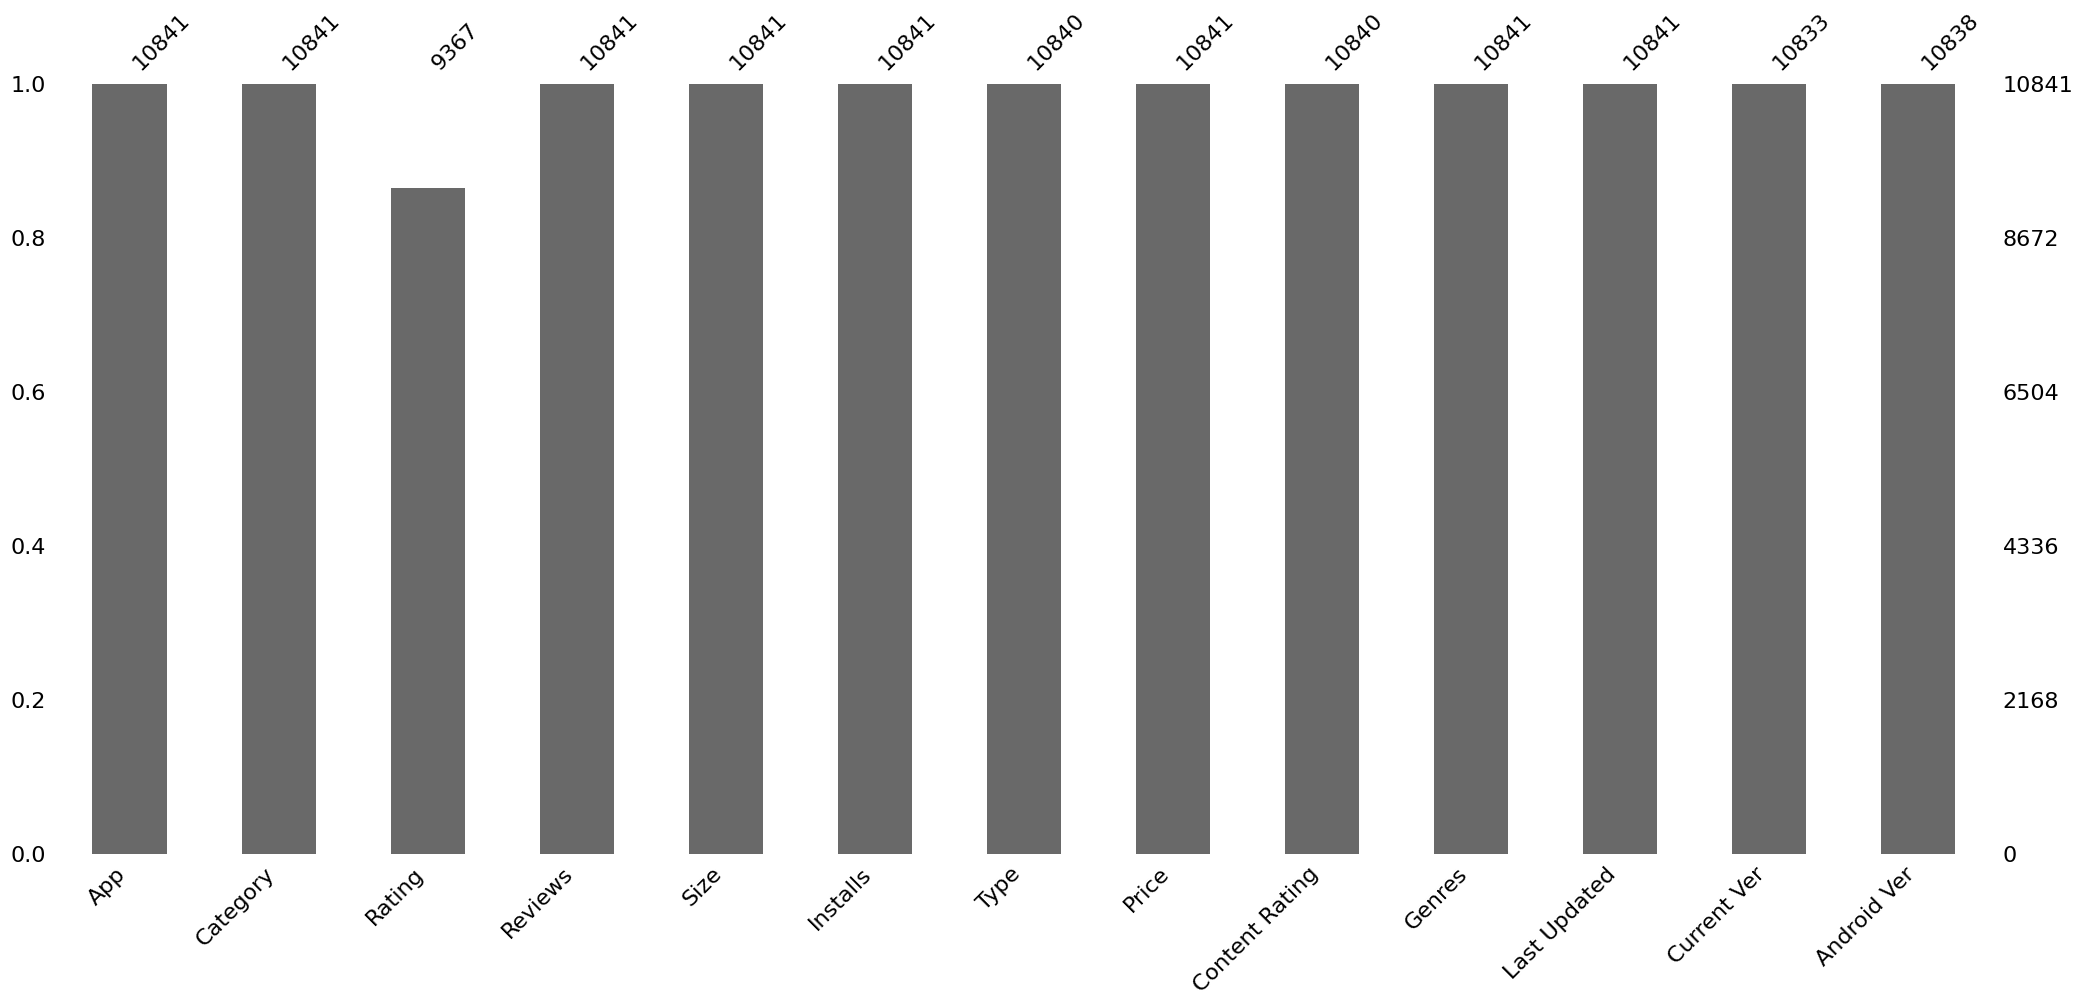

In [5]:
msno.bar(df)

In [8]:
df.isna().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

<Axes: >

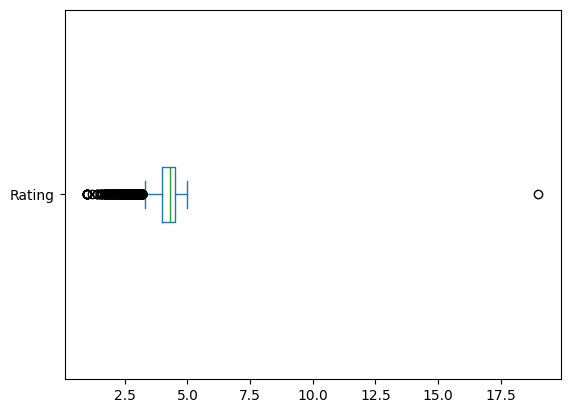

In [12]:
df['Rating'].plot(kind = 'box', vert = False)

In [14]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [15]:
df.loc[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan

<Axes: >

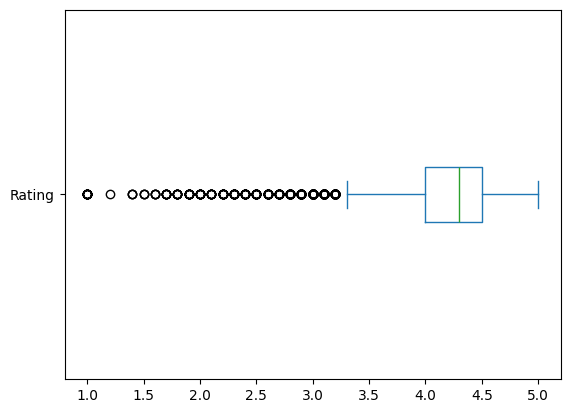

In [17]:
df['Rating'].plot(kind = 'box', vert = False)

In [18]:
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Clean the Reviews and make it numeric

In [22]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [24]:
df['Reviews_Numeric'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [28]:
df.loc[df['Reviews_Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.191757,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [30]:
new_reviews = (
    pd.to_numeric(
        df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M', '')
    ) * 1_000_000).astype(str)
new_reviews

10472    3000000.0
Name: Reviews, dtype: object

In [31]:
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] = (
        pd.to_numeric(
            df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M', '')
        ) * 1_000_000).astype(str)

In [33]:
df.loc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.191757,3000000.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [36]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           10841 non-null  float64
 3   Reviews          10841 non-null  float64
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10840 non-null  object 
 7   Price            10841 non-null  object 
 8   Content Rating   10840 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Ver      10833 non-null  object 
 12  Android Ver      10838 non-null  object 
 13  Reviews_Numeric  10840 non-null  float64
dtypes: float64(3), object(11)
memory usage: 1.2+ MB


In [42]:
#Find duplicated apps
df.loc[df.duplicated(subset = 'App', keep = False)].sort_values(by = 'App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160.0
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160.0
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12.0


In [43]:
df.duplicated(subset = 'App', keep = False).sum()

np.int64(1979)

In [45]:
#Drop all duplicated and keep only the ones with the greatest number of reviews
df.loc[df.duplicated(subset = 'App', keep = False)].sort_values(by = ['App', 'Reviews'], ascending = [True, False]).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160.0
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160.0
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12.0


In [46]:
#df_copy = df.copy() Just in case

In [47]:
df.sort_values(by = ['App', 'Reviews'], ascending = [True, False], inplace = True)

In [48]:
df.drop_duplicates(subset = ['App'], keep = 'first', inplace = True)

In [49]:
df.reset_index(drop = True, inplace = True)

In [50]:
df.loc[df.duplicated(subset = 'App', keep = False)].sort_values(by = ['App', 'Reviews'], ascending = [True, False]).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric


In [54]:
#Format the category column
df['Category']

0              SPORTS
1              SOCIAL
2              COMICS
3               TOOLS
4       COMMUNICATION
            ...      
9655    VIDEO_PLAYERS
9656        LIFESTYLE
9657           SOCIAL
9658            TOOLS
9659    ENTERTAINMENT
Name: Category, Length: 9660, dtype: object

In [61]:
df.groupby('Category')['Rating'].agg(['mean', 'max', 'min', 'count'])

,mean,max,min,count
Category,,,,
1.9,4.191757,4.191757,4.191757,1
ART_AND_DESIGN,4.353828,5.000000,3.200000,61
AUTO_AND_VEHICLES,4.190601,4.900000,2.100000,85
BEAUTY,4.260553,4.900000,3.100000,53
BOOKS_AND_REFERENCE,4.308393,5.000000,2.700000,222
BUSINESS,4.133347,5.000000,1.000000,420
COMICS,4.181848,5.000000,2.800000,56
COMMUNICATION,4.134647,5.000000,1.000000,315
DATING,4.026441,5.000000,1.000000,170


In [62]:
df['Category'].value_counts()

Category
FAMILY                 1874
GAME                    946
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               107
ENTERTAINMENT            87
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [63]:
#Replace underscores with spaces and only capitalize the first word
df['Category'] = df['Category'].str.replace('_', ' ').str.capitalize()

In [64]:
df['Category'].value_counts()

Category
Family                 1874
Game                    946
Tools                   829
Business                420
Medical                 395
Personalization         376
Productivity            374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     222
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               107
Entertainment            87
Auto and vehicles        85
Libraries and demo       84
Weather                  79
House and home           73
Events                   64
Art and design           61
Parenting                60
Comics                   56
Beauty                   53
1.9                       1
Name: count, dtype: int64

In [80]:
#Clean and convert Installs column to numeric type
df.loc[pd.to_numeric(df['Installs'], errors = 'coerce').isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
0,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27.0,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,27.0
1,+Download 4 Instagram Twitter,Social,4.500000,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,40467.0
2,- Free Comics - Comic Apps,Comics,3.500000,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,115.0
3,.R,Tools,4.500000,259.0,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,259.0
4,/u/app,Communication,4.700000,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,573.0


In [83]:
df['Installs'] = pd.to_numeric(
    df['Installs']
    .str.replace('+', '', regex = False)
    .str.replace(',', '', regex = False),
errors = 'coerce')

In [84]:
df['Installs'].unique()

array([5.e+02, 1.e+06, 1.e+04, 1.e+02, 1.e+05, 5.e+05, 1.e+07, 5.e+03,
       5.e+04, 5.e+00, 1.e+03, 1.e+01, 5.e+07, 1.e+08, 5.e+06, 5.e+01,
       0.e+00, 1.e+00, 5.e+08, 1.e+09,    nan])

In [85]:
df.loc[df['Installs'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
5806,Life Made WI-Fi Touchscreen Photo Frame,1.9,4.191757,3000000.0,"1,000+",NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [86]:
df = df.dropna(subset = ['Installs'])

In [87]:
df.loc[df['Installs'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric


In [97]:
#Clean and Covert Size column to represent bytes taken
# 1KB = 1024 bytes, 1MB = 1024KB, so 1MB = 1048576 bytes
df.head()

0    3.6
1     22
2    9.1
3    203
4     53
Name: Size, dtype: object

In [ ]:
#df_copy_1 = df

In [110]:
df = df_copy_1.copy()

In [120]:
df.loc[df['Size'] == 'Varies with device', 'Size'] = 0

In [121]:
df['Size'].str.replace('M', '').str.replace('k', '')

0       3.6
1        22
2       9.1
3       203
4        53
       ... 
9655     59
9656     26
9657     18
9658    3.2
9659    4.0
Name: Size, Length: 9659, dtype: object

In [122]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
0,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27.0,3.6M,500.0,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,27.0
1,+Download 4 Instagram Twitter,Social,4.500000,40467.0,22M,1000000.0,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,40467.0
2,- Free Comics - Comic Apps,Comics,3.500000,115.0,9.1M,10000.0,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,115.0
3,.R,Tools,4.500000,259.0,203k,10000.0,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,259.0
4,/u/app,Communication,4.700000,573.0,53M,10000.0,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,573.0


In [123]:
#Need to find k's and find M's and do appropriate calculations with them
df.loc[df['Size'].str.contains('k|K', na = False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
3,.R,Tools,4.500000,259.0,203k,10000.0,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,259.0
52,30-Day Ab Challenge Tracker,Health and fitness,3.500000,224.0,371k,10000.0,Free,0,Everyone,Health & Fitness,"July 9, 2014",1.2.6,4.1 and up,224.0
77,4-T's Bar-BQ & Catering,Shopping,4.191757,0.0,243k,10.0,Free,0,Everyone,Shopping,"January 16, 2017",1.0.1,4.1 and up,0.0
118,A-B repeater,Video players,4.400000,32.0,239k,5000.0,Free,0,Everyone,Video Players & Editors,"May 18, 2018",1.8,3.0 and up,32.0
196,AE Checkout Plugin,Shopping,3.800000,208.0,78k,10000.0,Free,0,Everyone,Shopping,"February 11, 2015",1.3.1,2.3 and up,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,meStudying: AP English Lit,Family,5.000000,1.0,655k,10.0,Paid,$4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,1.0
9555,mySharpBranded CI Test,Tools,4.191757,0.0,898k,1.0,Free,0,Everyone,Tools,"October 4, 2017",1.0.7,4.2 and up,0.0
9573,qEG APP / Química EG SRL,Tools,4.191757,0.0,118k,10.0,Free,0,Everyone,Tools,"July 24, 2018",1.0,4.0 and up,0.0
9583,signály.cz,Social,4.191757,38.0,881k,1000.0,Free,0,Everyone,Social,"May 9, 2013",1.1,2.2 and up,38.0


In [124]:
(pd.to_numeric(df.loc[df['Size'].str.contains('k', case = False, na = False), 'Size'].str.replace('k', '')) * 1024).head()

3      207872.0
52     379904.0
77     248832.0
118    244736.0
196     79872.0
Name: Size, dtype: float64

In [125]:
df.loc[df['Size'].str.contains('k', case = False, na = False), 'Size'] = (pd.to_numeric
    (df.loc[df['Size']
        .str.contains('k', case = False, na = False), 'Size']
        .str.replace('k', '')) 
        * 1024).astype(str)

In [127]:
df.loc[df['Size'].str.contains('m|M', na = False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
0,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27.0,3.6M,500.0,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,27.0
1,+Download 4 Instagram Twitter,Social,4.500000,40467.0,22M,1000000.0,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,40467.0
2,- Free Comics - Comic Apps,Comics,3.500000,115.0,9.1M,10000.0,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,115.0
4,/u/app,Communication,4.700000,573.0,53M,10000.0,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,573.0
5,058.ba,News and magazines,4.400000,27.0,14M,100.0,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.191757,414.0,59M,100000.0,Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,414.0
9656,💎 I'm rich,Lifestyle,3.800000,718.0,26M,10000.0,Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,718.0
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098.0,18M,1000000.0,Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,22098.0
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19.0,3.2M,10000.0,Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,19.0


In [128]:
df.loc[df['Size'].str.contains('M', case = False, na = False), 'Size'] = (pd.to_numeric
    (df.loc[df['Size']
        .str.contains('M', case = False, na = False), 'Size']
        .str.replace('M', '')) 
        * (1024 * 1024)).astype(str)

In [129]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
0,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27.0,3774873.6,500.0,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,27.0
1,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000.0,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,40467.0
2,- Free Comics - Comic Apps,Comics,3.500000,115.0,9542041.6,10000.0,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,115.0
3,.R,Tools,4.500000,259.0,207872.0,10000.0,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,259.0
4,/u/app,Communication,4.700000,573.0,55574528.0,10000.0,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,573.0
5,058.ba,News and magazines,4.400000,27.0,14680064.0,100.0,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,27.0
6,1. FC Köln App,Sports,4.600000,2019.0,42991616.0,100000.0,Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up,2019.0
7,10 Best Foods for You,Health and fitness,4.000000,2490.0,3984588.8,500000.0,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
8,10 Minutes a Day Times Tables,Family,4.100000,681.0,50331648.0,100000.0,Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up,681.0
9,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.500000,10.0,3984588.8,100.0,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,10.0


In [133]:
df['Size'] = pd.to_numeric(df['Size'])

In [134]:
#df_copy_2 = df

<Axes: ylabel='Frequency'>

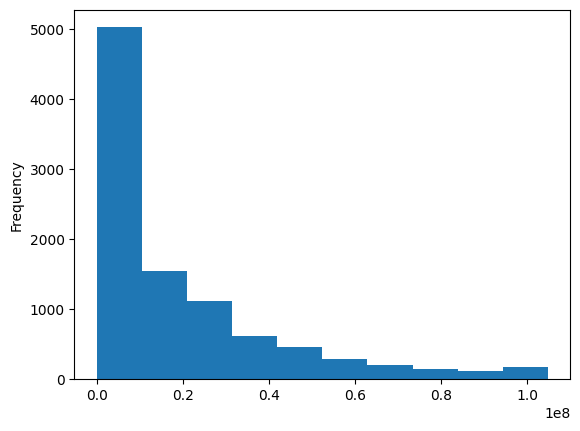

In [135]:
df['Size'].plot(kind = 'hist')

In [ ]:
#df_copy_3 = df

In [139]:
#Clean and convert the Price column to numeric
df.loc[df['Price'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric


In [144]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [148]:
df.loc[df['Type'].isna(), 'Type'] = 'Free'

In [150]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [151]:
df.loc[df['Price'].str.contains('$', regex = False)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
9,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.5,10.0,3984588.8,100.0,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,10.0
10,"10,000 Quotes DB (Premium)",Books and reference,4.1,70.0,3670016.0,500.0,Paid,$0.99,Everyone,Books & Reference,"August 30, 2013",1.3,2.1 and up,70.0
19,17th Edition Cable Sizer,Books and reference,4.4,47.0,1468006.4,1000.0,Paid,$3.08,Everyone,Books & Reference,"May 27, 2016",1.22,2.2 and up,47.0
23,2 Amateur ham radio CW Morse code practice key...,Communication,4.8,6.0,3670016.0,100.0,Paid,$1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,6.0
29,2017 EMRA Antibiotic Guide,Medical,4.4,12.0,3984588.8,1000.0,Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12.0


In [153]:
df['Price'] = df['Price'].str.replace('$', '')

In [154]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric
0,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27.0,3774873.6,500.0,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,27.0
1,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000.0,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,40467.0
2,- Free Comics - Comic Apps,Comics,3.500000,115.0,9542041.6,10000.0,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,115.0
3,.R,Tools,4.500000,259.0,207872.0,10000.0,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,259.0
4,/u/app,Communication,4.700000,573.0,55574528.0,10000.0,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,573.0
5,058.ba,News and magazines,4.400000,27.0,14680064.0,100.0,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,27.0
6,1. FC Köln App,Sports,4.600000,2019.0,42991616.0,100000.0,Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up,2019.0
7,10 Best Foods for You,Health and fitness,4.000000,2490.0,3984588.8,500000.0,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
8,10 Minutes a Day Times Tables,Family,4.100000,681.0,50331648.0,100000.0,Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up,681.0
9,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.500000,10.0,3984588.8,100.0,Paid,1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up,10.0


In [155]:
df['Price'] = pd.to_numeric(df['Price'])

In [ ]:
#df_copy_4 = df

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 9659
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              9659 non-null   object 
 1   Category         9659 non-null   object 
 2   Rating           9659 non-null   float64
 3   Reviews          9659 non-null   float64
 4   Size             9659 non-null   float64
 5   Installs         9659 non-null   float64
 6   Type             9659 non-null   object 
 7   Price            9659 non-null   float64
 8   Content Rating   9659 non-null   object 
 9   Genres           9659 non-null   object 
 10  Last Updated     9659 non-null   object 
 11  Current Ver      9651 non-null   object 
 12  Android Ver      9657 non-null   object 
 13  Reviews_Numeric  9659 non-null   float64
dtypes: float64(6), object(8)
memory usage: 1.1+ MB


In [158]:
#A distribution column containing value free or paid depending on price
df['Distribution'] = 'Free' #Set all to free

In [161]:
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'

In [162]:
df.loc[df['Type'] != df['Distribution']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution


Analysis

In [163]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
0,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27.0,3774873.6,500.0,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,27.0,Free
1,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000.0,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,40467.0,Free
2,- Free Comics - Comic Apps,Comics,3.500000,115.0,9542041.6,10000.0,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,115.0,Free
3,.R,Tools,4.500000,259.0,207872.0,10000.0,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,259.0,Free
4,/u/app,Communication,4.700000,573.0,55574528.0,10000.0,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,573.0,Free


In [165]:
#Which company has the most reviews
df.sort_values(by = 'Reviews', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
4328,Facebook,Social,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,78158306.0,Free
9042,WhatsApp Messenger,Communication,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,69119316.0,Free
5399,Instagram,Social,4.5,66577446.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,66577446.0,Free
6166,Messenger – Text and Video Chat for Free,Communication,4.0,56646578.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,56646578.0,Free
2564,Clash of Clans,Game,4.6,44893888.0,102760448.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,44893888.0,Free


In [168]:
df['Category'].value_counts()

Category
Family                 1874
Game                    946
Tools                   829
Business                420
Medical                 395
Personalization         376
Productivity            374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     222
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               107
Entertainment            87
Auto and vehicles        85
Libraries and demo       84
Weather                  79
House and home           73
Events                   64
Art and design           61
Parenting                60
Comics                   56
Beauty                   53
Name: count, dtype: int64

In [171]:
#Which category does the most expensive app belong to
df.sort_values(by = 'Price', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
5327,I'm Rich - Trump Edition,Lifestyle,3.600000,275.0,7654604.8,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,275.0,Paid
5328,I'm Rich/Eu sou Rico/أنا غني/我很有錢,Lifestyle,4.191757,0.0,41943040.0,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0.0,Paid
5321,I am rich,Lifestyle,3.800000,3547.0,1887436.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,3547.0,Paid
5317,I am Rich Plus,Family,4.000000,856.0,9122611.2,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,856.0,Paid
9656,💎 I'm rich,Lifestyle,3.800000,718.0,27262976.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,718.0,Paid


In [174]:
#Most expensive game
df[df['Category'] == 'Game'].sort_values(by = 'Price', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
8419,The World Ends With You,Game,4.6,4108.0,13631488.0,10000.0,Paid,17.99,Everyone 10+,Arcade,"December 14, 2015",1.0.4,4.0 and up,4108.0,Paid
8594,Trine 2: Complete Story,Game,3.8,252.0,11534336.0,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,252.0,Paid
1645,Blackjack Verite Drills,Game,4.6,17.0,4928307.2,100.0,Paid,14.00,Teen,Casino,"July 9, 2017",1.1.10,3.0 and up,17.0,Paid
8015,Star Wars ™: DIRTY,Game,4.5,38207.0,15728640.0,100000.0,Paid,9.99,Teen,Role Playing,"October 19, 2015",1.0.6,4.1 and up,38207.0,Paid
1391,Backgammon NJ for Android,Game,4.4,1644.0,15728640.0,10000.0,Paid,7.99,Everyone,Board,"April 5, 2017",4.1,2.3.3 and up,1644.0,Paid


In [176]:
#Most popular finance app
df.loc[df['Category'] == 'Finance'].sort_values(by = 'Installs', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
4936,Google Pay,Finance,4.2,348132.0,0.0,100000000.0,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device,348132.0,Free
6904,PayPal,Finance,4.3,659760.0,49283072.0,50000000.0,Free,0.0,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up,659760.0,Free
9629,İşCep,Finance,4.5,381788.0,33554432.0,10000000.0,Free,0.0,Everyone,Finance,"August 2, 2018",3.22.0,4.1 and up,381788.0,Free
9026,Wells Fargo Mobile,Finance,4.4,250719.0,38797312.0,10000000.0,Free,0.0,Everyone,Finance,"July 31, 2018",6.8.0.109,5.0 and up,250719.0,Free
2376,Capital One® Mobile,Finance,4.6,510401.0,82837504.0,10000000.0,Free,0.0,Everyone,Finance,"August 1, 2018",5.38.1,5.0 and up,510401.0,Free


In [178]:
#Most reviews for a teen game
df.loc[(df['Category'] == 'Game') & (df['Content Rating'] == 'Teen')].sort_values(by = 'Reviews_Numeric', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
832,Asphalt 8: Airborne,Game,4.5,8389714.0,96468992.0,100000000.0,Free,0.0,Teen,Racing,"July 4, 2018",3.7.1a,4.0.3 and up,8389714.0,Free
6249,Mobile Legends: Bang Bang,Game,4.4,8219586.0,103809024.0,100000000.0,Free,0.0,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up,8219586.0,Free
5283,Hungry Shark Evolution,Game,4.5,6074627.0,104857600.0,100000000.0,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,6074627.0,Free
4809,Garena Free Fire,Game,4.5,5534114.0,55574528.0,100000000.0,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up,5534114.0,Free
7024,Pixel Gun 3D: Survival shooter & Battle Royale,Game,4.5,4487182.0,57671680.0,50000000.0,Free,0.0,Teen,Action,"July 4, 2018",15.1.2,4.0.3 and up,4487182.0,Free


In [182]:
#Which paid game has the most reviews
df.loc[(df['Distribution'] == 'Paid') & (df['Category'] == 'Game')].sort_values(
    by = 'Reviews_Numeric', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
5197,Hitman Sniper,Game,4.6,408292.0,30408704.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,408292.0,Paid
4960,Grand Theft Auto: San Andreas,Game,4.4,348962.0,27262976.0,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,348962.0,Paid
4484,Five Nights at Freddy's,Game,4.6,100805.0,52428800.0,1000000.0,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,100805.0,Paid
3432,DraStic DS Emulator,Game,4.6,87766.0,12582912.0,1000000.0,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,87766.0,Paid
4690,Fruit Ninja Classic,Game,4.3,85468.0,37748736.0,1000000.0,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,85468.0,Paid


In [184]:
#How many Terabytes were transferred for the most popular lifestyle app
df.loc[df['Category'] == 'Lifestyle'].sort_values(by = 'Installs', ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Numeric,Distribution
8482,Tinder,Lifestyle,4.0,2789775.0,71303168.0,100000000.0,Free,0.0,Mature 17+,Lifestyle,"August 2, 2018",9.5.0,4.4 and up,2789775.0,Free
7652,Samsung+,Lifestyle,4.5,82145.0,31457280.0,50000000.0,Free,0.0,Everyone,Lifestyle,"July 5, 2018",10.19.0.0,4.4 and up,82145.0,Free
7855,"Sleep as Android: Sleep cycle tracker, smart a...",Lifestyle,4.3,246201.0,0.0,10000000.0,Free,0.0,Everyone,Lifestyle,"July 23, 2018",Varies with device,Varies with device,246201.0,Free
9267,Zara,Lifestyle,4.3,95905.0,34603008.0,10000000.0,Free,0.0,Everyone,Lifestyle,"July 30, 2018",4.1.0,4.1 and up,95905.0,Free
4792,Galaxy Gift,Lifestyle,4.4,95557.0,16777216.0,10000000.0,Free,0.0,Everyone,Lifestyle,"July 23, 2018",7.0.8,4.0.3 and up,95557.0,Free


In [185]:
lifestyle_df = df.loc[df['Category'] == 'Lifestyle']

In [188]:
most_popular = lifestyle_df.loc[lifestyle_df['Installs'].idxmax()]

In [190]:
print(most_popular['Installs'] * most_popular['Size'], 'bytes')

7130316800000000.0 bytes


In [191]:
print((most_popular['Installs'] * most_popular['Size'])/1_099_511_627_776, 'Terabytes')

6484.9853515625 Terabytes
